In [1]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

mydb = pymysql.connect(
    host= "localhost",
    user = 'root',
    password = 'root',
    database= 'phonepe_data',
    autocommit= True)

mycursor = mydb.cursor()



In [2]:
mycursor

In [3]:
sql1 = """ show tables;
"""
mycursor.execute(sql1)

data=mycursor.fetchall()
print(data)

(('agg_insurance',), ('agg_trans',), ('agg_user',), ('map_insurance',), ('map_transaction',), ('map_users',), ('top_insurance',), ('top_transaction',), ('top_users',))


## SQL QUERIES

## Business Case 1: Decoding Transaction Dynamics on PhonePe
Goal:

To understand how transactions vary across states, quarters, and payment categories, and identify which states or transaction types drive the highest growth or decline over time.

### Query 1: Total Transaction Amount and Count by Year

In [4]:

query1 = """
SELECT 
    Year,
    SUM(Transacion_count) AS total_transactions,
    SUM(Transacion_amount) AS total_amount
FROM agg_trans
GROUP BY Year
ORDER BY Year;
"""
mycursor.execute(query1)

data= mycursor.fetchall()
df1 = pd.DataFrame(data, columns=['Year',"Total_Transactions","Total_Amount"])
df1




,Year,Total_Transactions,Total_Amount
0,2018,2160404820,3.246091e+12
1,2019,8159654430,1.255338e+13
2,2020,15947949482,2.928232e+13
3,2021,38576858440,6.919740e+13
4,2022,78602587468,1.285327e+14
5,2023,128514109374,1.889836e+14
6,2024,198606869734,2.592491e+14


In [5]:
df1.columns

Index(['Year', 'Total_Transactions', 'Total_Amount'], dtype='object')

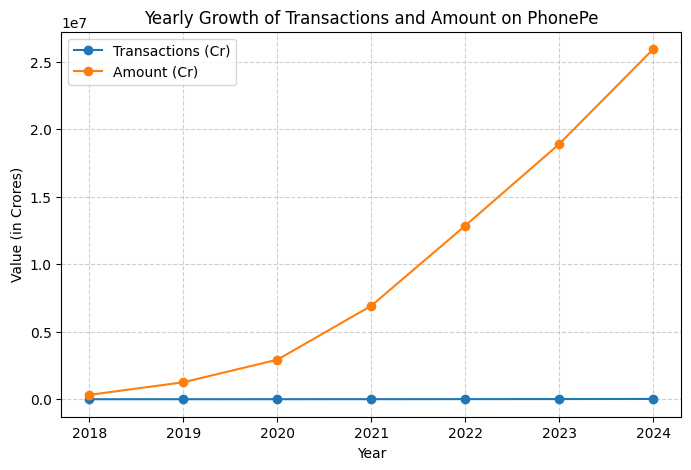

In [51]:
df1["Total_Transactions"] = df1["Total_Transactions"].astype(float)
plt.figure(figsize=(8,5))

plt.plot(df1["Year"], df1["Total_Transactions"]/1e7, marker='o', label="Transactions (Cr)")
plt.plot(df1["Year"], df1["Total_Amount"]/1e7, marker='o', label="Amount (Cr)")

plt.title("Yearly Growth of Transactions and Amount on PhonePe")
plt.xlabel("Year")
plt.ylabel("Value (in Crores)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()



Insight:

Both Total Transaction Amount (blue bars) and Total Transactions (orange line) are increasing sharply from 2018 → 2024.

The growth appears exponential, showing strong adoption momentum over time.

### Query 2: Top 10 States by Total Transaction Amount

In [8]:
query2 = """
SELECT 
    State,
    SUM(Transacion_amount) AS total_amount
FROM agg_trans
GROUP BY State
ORDER BY total_amount DESC
LIMIT 10;
"""
mycursor.execute(query2)
data = mycursor.fetchall()
df2 = pd.DataFrame(data, columns=['State', 'Total_Transaction_Amount'])
df2


,State,Total_Transaction_Amount
0,telangana,8.331191e+13
1,karnataka,8.135744e+13
2,maharashtra,8.074839e+13
3,andhra-pradesh,6.933816e+13
4,uttar-pradesh,5.377042e+13
5,rajasthan,5.268647e+13
6,madhya-pradesh,3.825056e+13
7,bihar,3.580270e+13
8,west-bengal,3.116833e+13
9,odisha,2.452796e+13


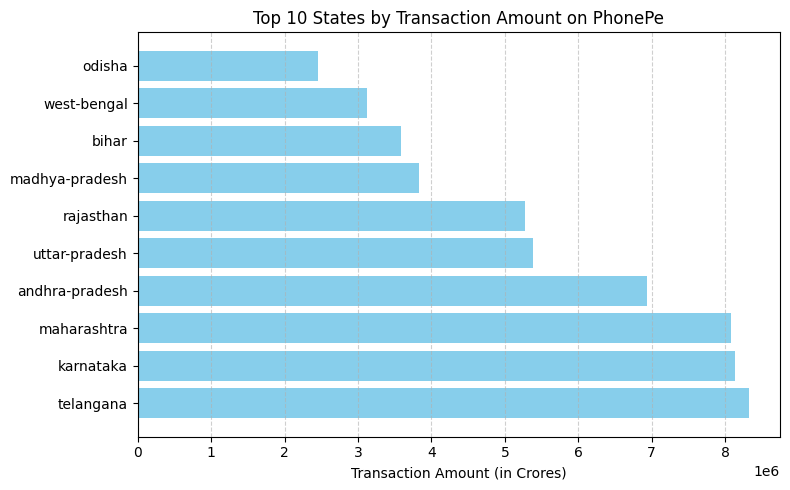

In [9]:

# Convert to numeric (just in case)
plt.figure(figsize=(8,5))
plt.barh(df2["State"], df2["Total_Transaction_Amount"]/1e7, color="skyblue")

plt.title("Top 10 States by Transaction Amount on PhonePe")
plt.xlabel("Transaction Amount (in Crores)")

plt.grid(axis='x', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Insight: 
Telangana, Karnataka, and Maharashtra lead in total transaction value, each surpassing ₹80 trillion. Andhra Pradesh and Uttar Pradesh follow closely, indicating strong digital payment activity in southern and northern India. These states together account for the majority of PhonePe’s total transaction volume, reflecting high urbanization, digital infrastructure, and user engagement.


### Query 3: Average Transaction Value by State

In [10]:
query3 = """
SELECT 
    State,
    ROUND(SUM(Transacion_amount)/SUM(Transacion_count), 2) AS avg_transaction_value
FROM agg_trans
GROUP BY State
ORDER BY avg_transaction_value DESC;
"""
mycursor.execute(query3)
data = mycursor.fetchall()
df3 = pd.DataFrame(data, columns=['State', 'Average_Transaction_Value'])
df3


,State,Average_Transaction_Value
0,manipur,2539.40
1,nagaland,2380.16
2,mizoram,2359.88
3,ladakh,2261.85
4,meghalaya,1833.85
5,andhra-pradesh,1832.53
6,lakshadweep,1820.51
7,sikkim,1806.01
8,andaman-&-nicobar-islands,1779.72
9,arunachal-pradesh,1712.83


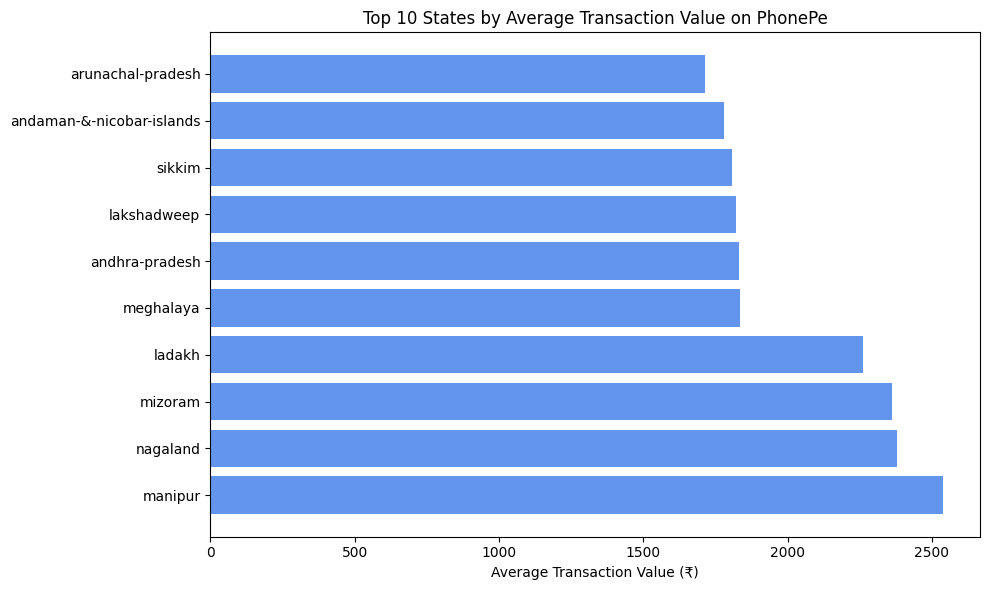

In [11]:

# Ensure numeric type
df3["Average_Transaction_Value"] = pd.to_numeric(df3["Average_Transaction_Value"], errors="coerce")

# Plot
plt.figure(figsize=(10,6))
plt.barh(df3["State"].head(10), df3["Average_Transaction_Value"].head(10), color="cornflowerblue")
plt.xlabel("Average Transaction Value (₹)")
plt.title("Top 10 States by Average Transaction Value on PhonePe")

plt.tight_layout()
plt.show()



Insight:
Northeastern states like Manipur, Nagaland, and Mizoram top the list with the highest average transaction values, indicating fewer but higher-value transactions.
In contrast, large-volume states like Maharashtra and Karnataka show lower averages, suggesting a higher frequency of smaller transactions, typical of high digital payment penetration and day-to-day usage.

### Query 4: Transaction Trends by Payment Type Over Time

In [12]:
query4 = """
SELECT 
    Year,
    Transacion_type,
    SUM(Transacion_amount) AS total_amount
FROM agg_trans
GROUP BY Year, Transacion_type
ORDER BY Year, total_amount DESC;
"""
mycursor.execute(query4)
data = mycursor.fetchall()
df4 = pd.DataFrame(data, columns=['Year', 'Transaction_Type', 'Total_Amount'])
df4


,Year,Transaction_Type,Total_Amount
0,2018,Peer-to-peer payments,2.865928e+12
1,2018,Recharge & bill payments,2.195318e+11
2,2018,Merchant payments,1.132796e+11
3,2018,Others,3.984564e+10
4,2018,Financial Services,7.505754e+09
5,2019,Peer-to-peer payments,1.097751e+13
6,2019,Merchant payments,8.228804e+11
7,2019,Recharge & bill payments,7.004055e+11
8,2019,Others,4.794107e+10
9,2019,Financial Services,4.635013e+09


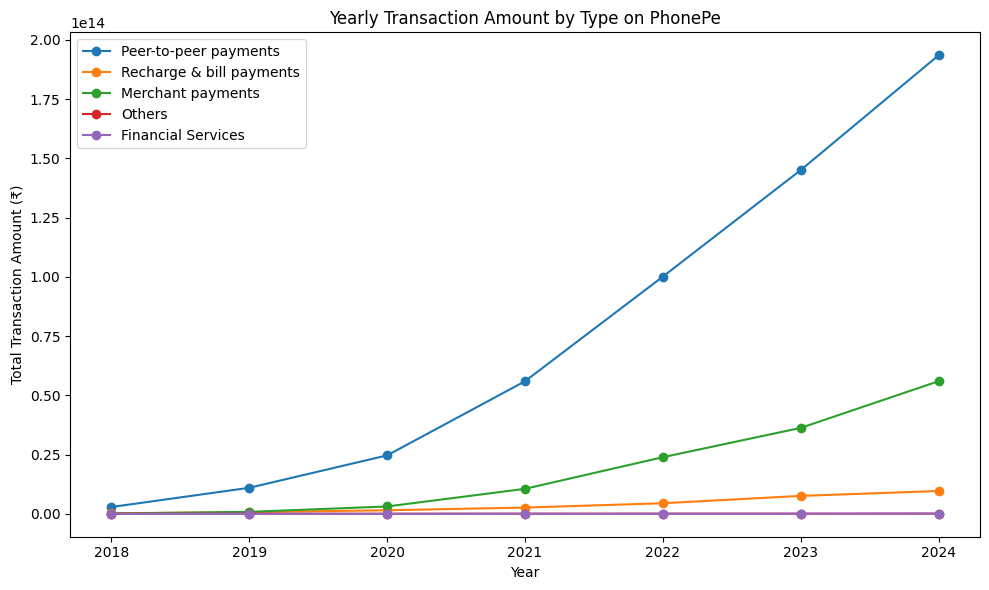

In [13]:

# Simple grouped line plot
plt.figure(figsize=(10,6))

for ttype in df4["Transaction_Type"].unique():
    subset = df4[df4["Transaction_Type"] == ttype]
    plt.plot(subset["Year"], subset["Total_Amount"], marker='o', label=ttype)

plt.title("Yearly Transaction Amount by Type on PhonePe")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount (₹)")
plt.legend()
plt.tight_layout()
plt.show()



Insight: 
Peer-to-peer (P2P) payments dominate the chart — consistently the highest and still growing rapidly.

Merchant payments are the second-largest, showing sharp growth post-2020 as digital commerce expanded.

Recharge & bill payments have grown steadily but at a smaller scale.

Financial Services and Others remain minimal contributors, though showing gradual increases.

### Query 5: Top 5 Districts by Transaction Amount (Latest Year)

In [14]:
query5 = """
SELECT 
    State,
    District,
    SUM(Transacion_amount) AS total_amount
FROM map_transaction
WHERE Year = (SELECT MAX(Year) FROM map_transaction)
GROUP BY State, District
ORDER BY total_amount DESC
LIMIT 5;
"""
mycursor.execute(query5)
data = mycursor.fetchall()
df5 = pd.DataFrame(data, columns=['State', 'District', 'Total_Transaction_Amount'])
df5


,State,District,Total_Transaction_Amount
0,karnataka,bengaluru urban district,1.339608e+13
1,maharashtra,pune district,5.910463e+12
2,telangana,rangareddy district,5.759314e+12
3,telangana,medchal malkajgiri district,4.617538e+12
4,telangana,hyderabad district,4.501224e+12


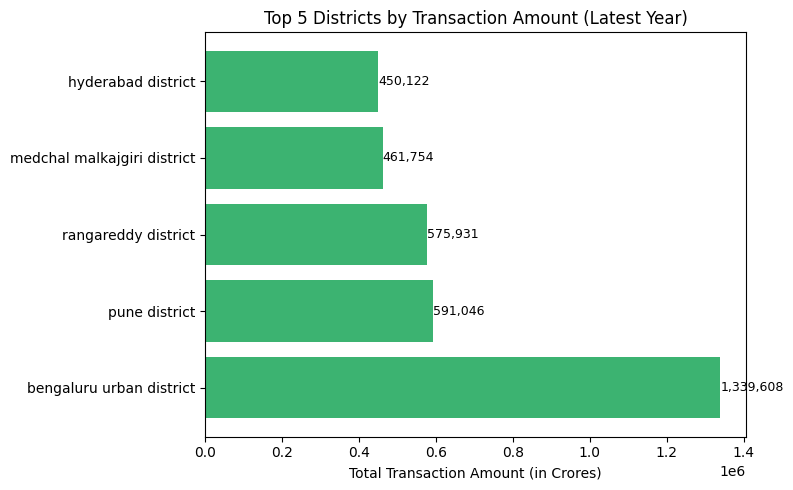

In [15]:


# Convert amount to numeric and scale (e.g., Crores for readability)
df5["Total_Transaction_Amount"] = pd.to_numeric(df5["Total_Transaction_Amount"], errors="coerce")
df5["Total_Transaction_Amount_Cr"] = df5["Total_Transaction_Amount"] / 1e7

# Plot
plt.figure(figsize=(8,5))
plt.barh(df5["District"], df5["Total_Transaction_Amount_Cr"], color="mediumseagreen")
plt.xlabel("Total Transaction Amount (in Crores)")
plt.title("Top 5 Districts by Transaction Amount (Latest Year)")

# Add value labels
for index, value in enumerate(df5["Total_Transaction_Amount_Cr"]):
    plt.text(value, index, f"{value:,.0f}", va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


Insights & Interpretation

Bengaluru Urban dominates all other districts by a huge margin — over ₹13 lakh crore in transactions — reaffirming its position as India’s digital payments hub and IT capital.

Districts like Pune and Hyderabad (along with Ranga Reddy and Medchal Malkajgiri) reflect the growing tech and service-based economies driving high transaction volumes.

Telangana’s multiple districts appearing in the top 5 highlights deep regional adoption of UPI payments within the state.

The urban–metro bias is evident, showing that large cities remain key contributors to India’s digital payment ecosystem.

### Business Insights Summary

The analysis of PhonePe’s transaction dynamics from 2018 to 2024 reveals remarkable growth in digital payments across India. Both transaction volume and value have surged exponentially, reflecting deep market penetration and increasing consumer trust in digital platforms. Telangana, Karnataka, and Maharashtra dominate in total transaction amount, while northeastern states like Manipur and Nagaland record the highest average transaction values, indicating selective but high-value usage. Peer-to-peer payments continue to lead overall activity, yet merchant transactions have shown a sharp upward trend since 2021, signaling strong adoption among small and medium enterprises. Additionally, metropolitan districts such as Bengaluru Urban, Pune, and Hyderabad remain key contributors, reaffirming urban centers as the backbone of India’s digital payment revolution.

## Business case 2: Device Dominance And User Engagement Analysis
Goal

To analyze how user activity and engagement differ across device brands and regions, helping PhonePe optimize performance and marketing for high-engagement devices and underutilized segments

In [16]:
query6 = """
SELECT 
    Year,
    SUM(Registered_Users) AS Total_Registered_Users,
    SUM(App_Opens) AS Total_App_Opens
FROM agg_user
GROUP BY Year
ORDER BY Year;
"""
mycursor.execute(query6)

data = mycursor.fetchall()
df6 = pd.DataFrame(data, columns=['Year', 'Total_Registered_Users', 'Total_App_Opens'])
df6


,Year,Total_Registered_Users,Total_App_Opens
0,2018,6441553184,0
1,2019,13261854716,190736192262
2,2020,20284206470,491204009802
3,2021,27934626060,1005285805766
4,2022,8204913794,345930490048


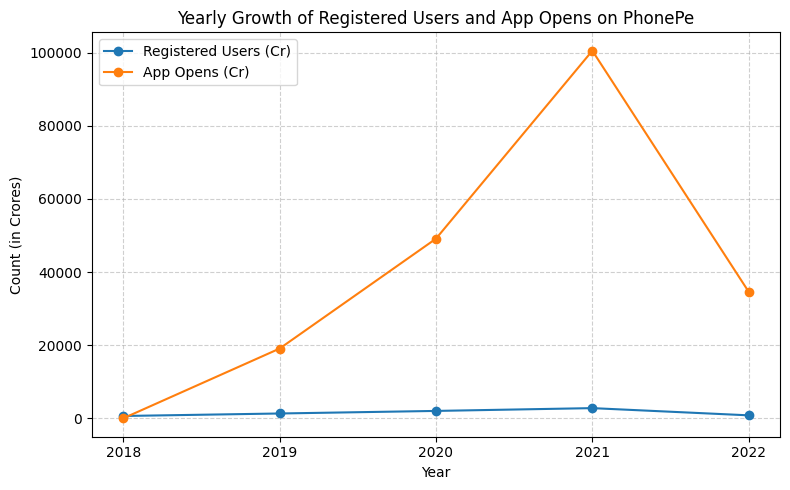

In [54]:

import decimal
df6 = df6.map(lambda x: float(x) if isinstance(x, decimal.Decimal) else x)
plt.figure(figsize=(8,5))

plt.plot(df6["Year"], df6["Total_Registered_Users"]/1e7, marker='o', label="Registered Users (Cr)")
plt.plot(df6["Year"], df6["Total_App_Opens"]/1e7, marker='o', label="App Opens (Cr)")

plt.title("Yearly Growth of Registered Users and App Opens on PhonePe")
plt.xlabel("Year")
plt.ylabel("Count (in Crores)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()




Insight: 

From 2018 to 2020, PhonePe experienced steady growth in both registered users and app engagement, reflecting strong adoption momentum. The year 2021 marked a significant inflection point, with unprecedented spikes in both metrics—driven by rapid digital payment adoption and pandemic-induced behavior shifts. However, 2022 saw a decline, suggesting market saturation and normalization of user activity. Overall, the data indicates that PhonePe has transitioned from a high-growth to a maturity phase, emphasizing the need to focus on user retention, re-engagement, and value-added services to sustain long-term growth.

### Query 2: Top 10 Device Brands by Registered Users (Latest Year)

This helps identify which brands dominate the PhonePe user base in the most recent year.

In [18]:
query7 = """
SELECT 
    Year,
    Brand,
    SUM(Registered_users) AS Total_Registered_Users
FROM agg_user
WHERE Year = (SELECT MAX(Year) FROM agg_user)
GROUP BY Year, Brand
ORDER BY Total_Registered_Users DESC
LIMIT 10;
"""
mycursor.execute(query7)
data = mycursor.fetchall()

df7 = pd.DataFrame(data, columns=['Year', 'Device_Brand', 'Total_Registered_Users'])
df7


,Year,Device_Brand,Total_Registered_Users
0,2022,Vivo,745901254
1,2022,Xiaomi,745901254
2,2022,Samsung,745901254
3,2022,Realme,745901254
4,2022,Oppo,745901254
5,2022,Others,745901254
6,2022,Apple,744737006
7,2022,OnePlus,663375150
8,2022,Motorola,645116858
9,2022,Huawei,632091242


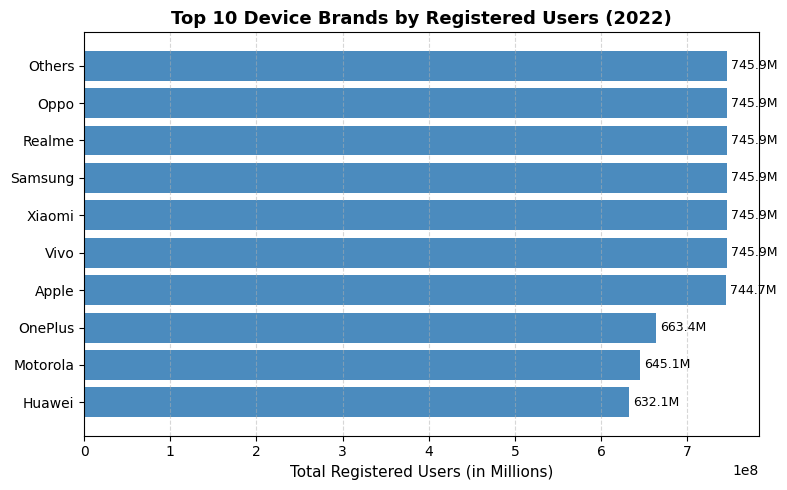

In [19]:


# Sort brands by user count for better visual order
df7 = df7.sort_values(by='Total_Registered_Users', ascending=True)

plt.figure(figsize=(8,5))
bars = plt.barh(df7['Device_Brand'], df7['Total_Registered_Users'], color='#4B8BBE')

# Add value labels at the end of bars
for bar in bars:
    plt.text(bar.get_width() + 5e6, 
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width()/1e6:.1f}M", 
             va='center', fontsize=9)

# Styling
plt.title('Top 10 Device Brands by Registered Users (2022)', fontsize=13, fontweight='bold')
plt.xlabel('Total Registered Users (in Millions)', fontsize=11)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


insight:
Vivo, Xiaomi, Samsung, Realme, Oppo, and Others dominate PhonePe’s registered user base, each with around 745 million users, indicating their strong penetration in India’s smartphone market.

Apple ranks slightly lower (~744M users), likely reflecting its smaller but loyal premium user segment.

OnePlus, Motorola, and Huawei have comparatively fewer users (630M–660M range), suggesting moderate engagement potential.

The near-similar user base across top Android brands suggests PhonePe enjoys wide adoption across diverse device segments, from budget to premium.

### Query 3 – Engagement Rate (App Opens per Registered User) by Brand 
Compare how actively users engage across different brands.

In [20]:
# SQL Query
query8 = """
SELECT 
    Brand,
    SUM(Registered_Users) AS total_registered_users,
    SUM(App_Opens) AS total_app_opens,
    ROUND(SUM(App_Opens) / SUM(Registered_Users), 2) AS engagement_rate
FROM agg_user
GROUP BY Brand
ORDER BY engagement_rate DESC;
"""

mycursor.execute(query8)
data = mycursor.fetchall()
df8 = pd.DataFrame(data, columns=['Device_Brand', 'Total_Registered_Users', 'Total_App_Opens', 'Engagement_Rate'])
df8


,Device_Brand,Total_Registered_Users,Total_App_Opens,Engagement_Rate
0,Tecno,1742707970,63637206796,36.52
1,OnePlus,5386582130,155851796408,28.93
2,Apple,6182166104,169350892716,27.39
3,Huawei,6471102634,176849691080,27.33
4,Infinix,710575038,18988232202,26.72
5,Xiaomi,6920650384,184832408898,26.71
6,Samsung,6920650384,184832408898,26.71
7,Vivo,6920650384,184832408898,26.71
8,Oppo,6920650384,184832408898,26.71
9,Realme,6920650384,184832408898,26.71


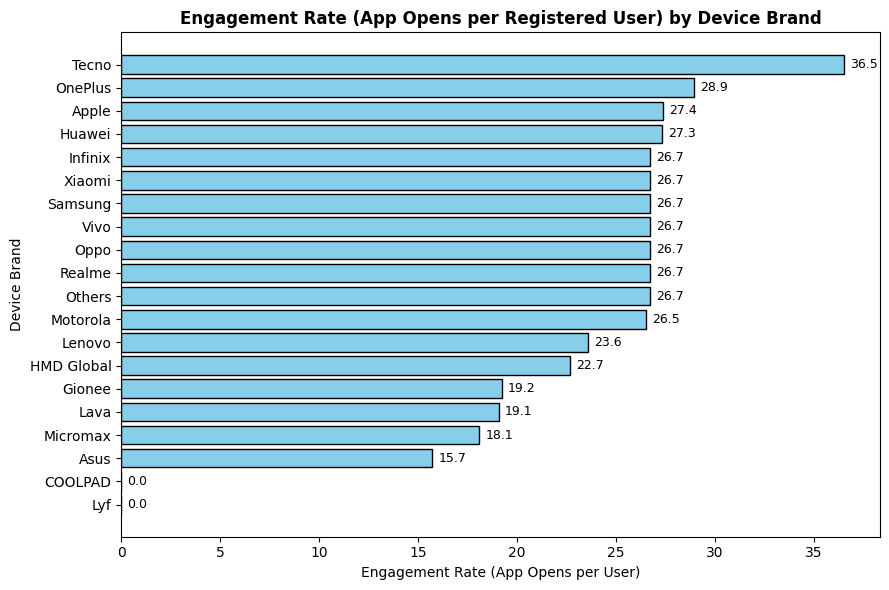

In [21]:

import matplotlib.pyplot as plt

# Ensure Engagement_Rate is float
df8['Engagement_Rate'] = df8['Engagement_Rate'].astype(float)

# Sort descending
df8_sorted = df8.sort_values(by='Engagement_Rate', ascending=False)

plt.figure(figsize=(9,6))
plt.barh(df8_sorted['Device_Brand'], df8_sorted['Engagement_Rate'], color='skyblue', edgecolor='black')

# Text labels at the end of bars
for i, v in enumerate(df8_sorted['Engagement_Rate']):
    plt.text(float(v) + 0.3, i, f"{v:.1f}", va='center', fontsize=9)

plt.title('Engagement Rate (App Opens per Registered User) by Device Brand', fontsize=12, weight='bold')
plt.xlabel('Engagement Rate (App Opens per User)')
plt.ylabel('Device Brand')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



Insights:

Tecno users have the highest engagement rate (≈36 app opens per user) — indicating a highly active user base despite a smaller overall user count.

OnePlus, Apple, and Huawei also show strong engagement (27–29 opens/user), suggesting users of these brands are frequent PhonePe users.

Mid-tier brands like Xiaomi, Samsung, Vivo, Oppo, and Realme show moderate engagement (~26–27), implying regular but not intense usage.

Older or budget brands (Asus, Micromax, Lava, Gionee) have lower engagement (<20), showing less app activity or possibly outdated devices.

Brands like Coolpad and Lyf have negligible or zero engagement, likely due to legacy users or inactive devices.

### Query 4 – Device Dominance by State 

 Determine which device brand leads in each state based on user count.

In [22]:
query9 = """
SELECT 
    t1.State,
    t1.Brand,
    t1.Registered_Users AS Top_Registered_Users
FROM agg_user t1
JOIN (
    SELECT 
        State,
        MAX(Registered_Users) AS MaxUsers
    FROM agg_user
    GROUP BY State
) t2
ON t1.State = t2.State AND t1.Registered_Users = t2.MaxUsers
ORDER BY t1.State;
"""

mycursor.execute(query9)
data = mycursor.fetchall()

df9 = pd.DataFrame(data, columns=['State', 'Device_Brand', 'Top_Registered_Users'])
df9



,State,Device_Brand,Top_Registered_Users
0,andaman-&-nicobar-islands,Vivo,76288
1,andaman-&-nicobar-islands,Xiaomi,76288
2,andaman-&-nicobar-islands,Samsung,76288
3,andaman-&-nicobar-islands,Realme,76288
4,andaman-&-nicobar-islands,Oppo,76288
...,...,...,...
787,west-bengal,Lenovo,21919787
788,west-bengal,Infinix,21919787
789,west-bengal,Asus,21919787
790,west-bengal,Apple,21919787


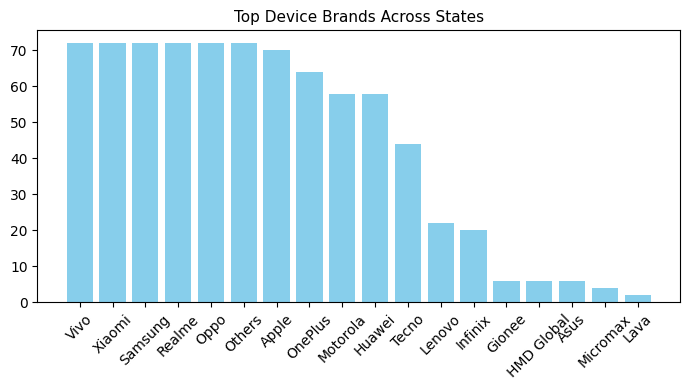

In [23]:

import matplotlib.pyplot as plt

brand_counts = df9['Device_Brand'].value_counts().reset_index()
brand_counts.columns = ['Device_Brand', 'Frequency']

plt.figure(figsize=(7,4))
plt.bar(brand_counts['Device_Brand'], brand_counts['Frequency'], color='skyblue')
plt.title('Top Device Brands Across States', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Insight:
Vivo, Xiaomi, Samsung, Realme, Oppo, and Others dominate the majority of Indian states in terms of registered users, showing a strong presence across regions.
In contrast, brands like Lava, Micromax, Asus, and HMD Global have minimal dominance, indicating lower regional user bases and weaker device penetration.

### Query 5 – Underutilized Devices (High Users, Low Engagement)
Highlight brands with high registrations but lower app engagement — targets for optimization.

In [24]:
query10 = """
SELECT Brand, SUM(Registered_Users) AS Total_Registered_Users,
       SUM(App_Opens) AS Total_App_Opens,
       ROUND(SUM(App_Opens)*1.0 / SUM(Registered_Users), 2) AS Engagement_Rate
FROM agg_user
GROUP BY Brand
ORDER BY Total_Registered_Users DESC;
"""

mycursor.execute(query10)
data = mycursor.fetchall()
df10 = pd.DataFrame(data, columns=['Device_Brand', 'Total_Registered_Users', 'Total_App_Opens', 'Engagement_Rate'])
df10


,Device_Brand,Total_Registered_Users,Total_App_Opens,Engagement_Rate
0,Xiaomi,6920650384,184832408898,26.71
1,Samsung,6920650384,184832408898,26.71
2,Vivo,6920650384,184832408898,26.71
3,Oppo,6920650384,184832408898,26.71
4,Realme,6920650384,184832408898,26.71
5,Others,6920650384,184832408898,26.71
6,Motorola,6678602152,177059138476,26.51
7,Huawei,6471102634,176849691080,27.33
8,Apple,6182166104,169350892716,27.39
9,OnePlus,5386582130,155851796408,28.93


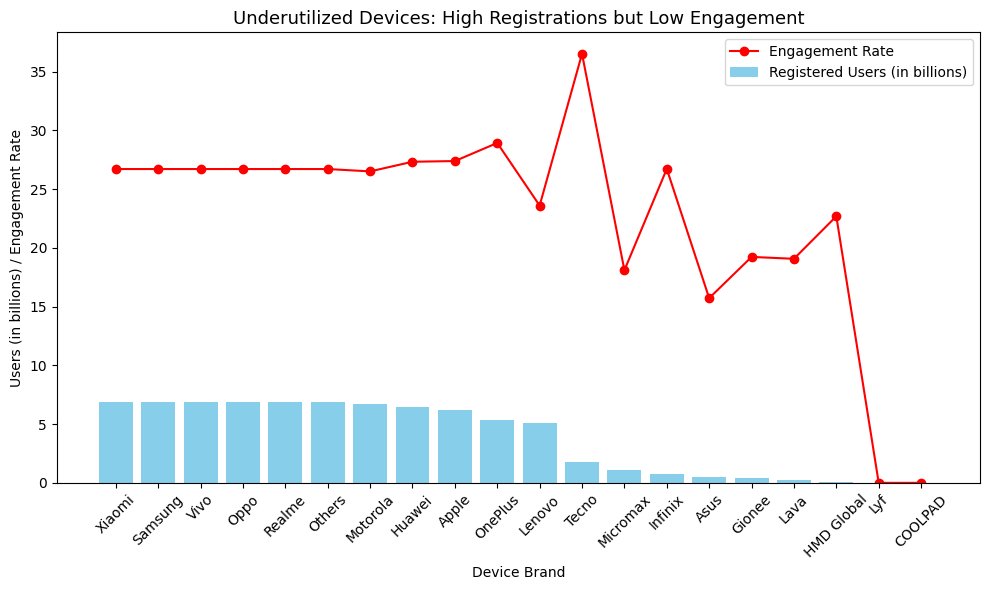

In [25]:
# Convert Decimal to float
df10['Total_Registered_Users'] = df10['Total_Registered_Users'].astype(float)
df10['Engagement_Rate'] = df10['Engagement_Rate'].astype(float)

# Simple plot
plt.figure(figsize=(10,6))
plt.bar(df10['Device_Brand'], df10['Total_Registered_Users']/1e9, color='skyblue', label='Registered Users (in billions)')
plt.plot(df10['Device_Brand'], df10['Engagement_Rate'], color='red', marker='o', label='Engagement Rate')

plt.title('Underutilized Devices: High Registrations but Low Engagement', fontsize=13)
plt.xlabel('Device Brand')
plt.ylabel('Users (in billions) / Engagement Rate')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Insights:

Lenovo and Motorola are the main underutilized brands — they have millions of registered users but below-average engagement.

Micromax has poor engagement but fewer users, so it’s not a major optimization focus.

Other top brands (Xiaomi, Samsung, Vivo, Oppo, Realme) have balanced or average engagement.

Top Android brands like Vivo, Xiaomi, Samsung, Oppo, and Realme dominate across most Indian states, showing strong market presence and user trust.
OnePlus and Apple users show the highest engagement rates, while Lenovo and Motorola have large user bases but low engagement, indicating potential areas for optimization.
Overall, the analysis reveals that PhonePe’s user engagement is consistent across major brands, but improving performance and targeting underutilized devices could further enhance user activity and retention.

## Business case 3 - Insurance Penetration and Growth Potential Analysis

To understand the growth trajectory of PhonePe’s insurance transactions over time.

In [26]:
query11 = """
SELECT 
    Year,
    SUM(Transacion_count) AS Total_Transactions,
    SUM(Transacion_amount) AS Total_Amount
FROM agg_insurance
GROUP BY Year
ORDER BY Year;
"""
mycursor.execute(query1)
data = mycursor.fetchall()
df11 = pd.DataFrame(data, columns=['Year', 'Total_Transactions', 'Total_Amount'])
df11


,Year,Total_Transactions,Total_Amount
0,2018,2160404820,3.246091e+12
1,2019,8159654430,1.255338e+13
2,2020,15947949482,2.928232e+13
3,2021,38576858440,6.919740e+13
4,2022,78602587468,1.285327e+14
5,2023,128514109374,1.889836e+14
6,2024,198606869734,2.592491e+14


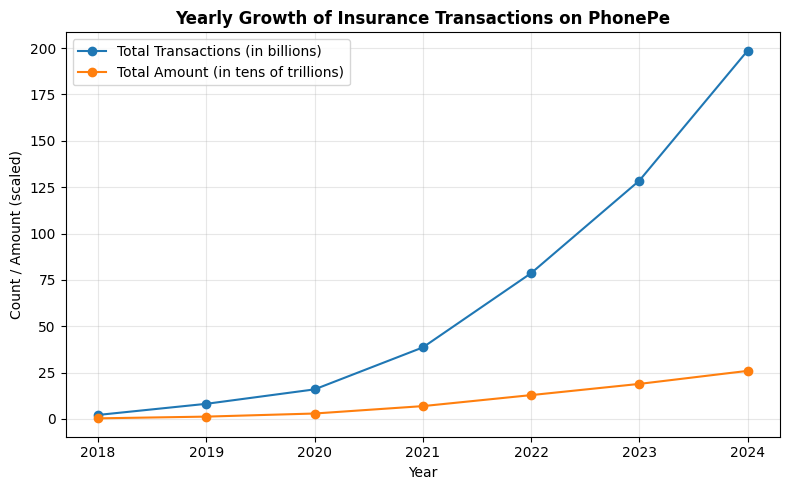

In [56]:
import decimal

# Convert Decimal columns in df11 to float
df11 = df11.applymap(lambda x: float(x) if isinstance(x, decimal.Decimal) else x)

plt.figure(figsize=(8,5))
plt.plot(df11['Year'], df11['Total_Transactions']/1e9, marker='o', label='Total Transactions (in billions)')
plt.plot(df11['Year'], df11['Total_Amount']/1e13, marker='o', label='Total Amount (in tens of trillions)')

plt.title('Yearly Growth of Insurance Transactions on PhonePe', fontsize=12, weight='bold')
plt.xlabel('Year')
plt.ylabel('Count / Amount (scaled)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Insight:

Insurance transactions on PhonePe have shown exponential growth from 2018 to 2024 — both in transaction volume and monetary value.
This indicates strong user trust and increased adoption of digital insurance services, especially post-2020, marking PhonePe’s rising influence in the fintech insurance segment.

### Query 2: Top 10 States by Insurance Transaction Amount

In [28]:
query12 = """
SELECT 
    State,
    SUM(Transacion_amount) AS Total_Amount
FROM agg_insurance
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 10;
"""
mycursor.execute(query2)
data = mycursor.fetchall()
df12 = pd.DataFrame(data, columns=['State', 'Total_Amount'])
df12


,State,Total_Amount
0,telangana,8.331191e+13
1,karnataka,8.135744e+13
2,maharashtra,8.074839e+13
3,andhra-pradesh,6.933816e+13
4,uttar-pradesh,5.377042e+13
5,rajasthan,5.268647e+13
6,madhya-pradesh,3.825056e+13
7,bihar,3.580270e+13
8,west-bengal,3.116833e+13
9,odisha,2.452796e+13


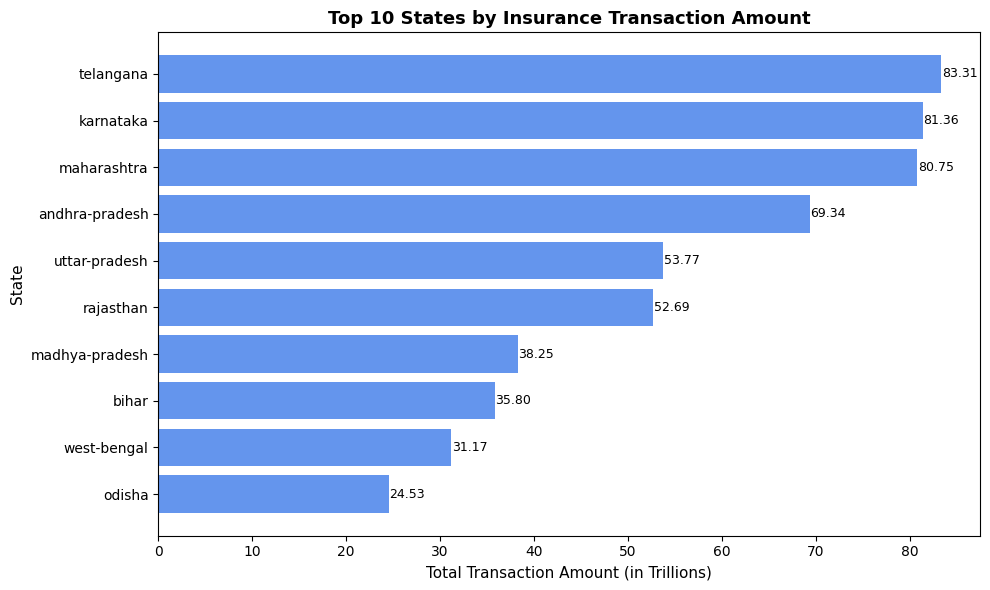

In [29]:
plt.figure(figsize=(10,6))
plt.barh(df12['State'], df12['Total_Amount'] / 1e12, color='cornflowerblue')
plt.gca().invert_yaxis()

plt.title("Top 10 States by Insurance Transaction Amount", fontsize=13, weight='bold')
plt.xlabel("Total Transaction Amount (in Trillions)", fontsize=11)
plt.ylabel("State", fontsize=11)

# Add value labels
for i, v in enumerate(df12['Total_Amount'] / 1e12):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


Insight: 

Telangana, Karnataka, and Maharashtra lead in total insurance transaction amount, collectively contributing a large share of PhonePe’s insurance activity.
Southern states show stronger adoption compared to northern and eastern regions, indicating higher financial penetration and user trust in digital insurance platforms.

### Query 3  Average Transaction Value per Insurance Policy 

In [30]:
query13 = """
SELECT 
    state,
    ROUND(SUM(insurance_amount) / SUM(insurance_count), 2) AS Avg_Transaction_Value
FROM agg_insurance
GROUP BY state
ORDER BY Avg_Transaction_Value DESC;
"""

mycursor.execute(query13)
data = mycursor.fetchall()
df13 = pd.DataFrame(data, columns=['State', 'Avg_Transaction_Value'])
df13



,State,Avg_Transaction_Value
0,ladakh,2339.22
1,arunachal-pradesh,2293.01
2,sikkim,2222.91
3,jammu-&-kashmir,1963.93
4,meghalaya,1946.02
5,nagaland,1929.74
6,manipur,1916.50
7,himachal-pradesh,1898.19
8,punjab,1739.26
9,uttarakhand,1613.73


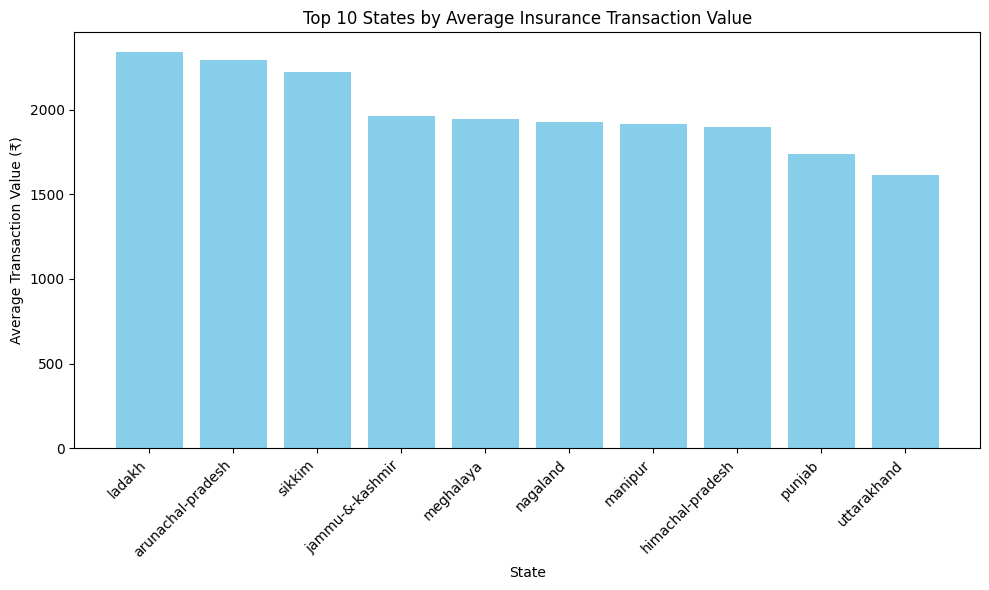

In [31]:
# Query 13 – Average Transaction Value per Insurance Policy
# Understand customer spending pattern across states

plt.figure(figsize=(10,6))
plt.bar(df13['State'][:10], df13['Avg_Transaction_Value'][:10], color='skyblue')
plt.title('Top 10 States by Average Insurance Transaction Value', fontsize=12)
plt.xlabel('State', fontsize=10)
plt.ylabel('Average Transaction Value (₹)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Insight:

States like Ladakh, Arunachal Pradesh, and Sikkim show the highest average transaction values, indicating customers in these regions tend to spend more per insurance policy.
In contrast, large states such as Andhra Pradesh, Bihar, and West Bengal have lower average values, suggesting smaller policy purchases or greater price sensitivity.
This insight helps PhonePe identify premium-focused regions versus mass-market insurance zones for targeted marketing.

### Query 4 - Year-over-Year Growth in Insurance Transactions Measure adoption acceleration

In [32]:
# Query 14 - Year-over-Year Growth in Insurance Transactions
query14 = """
SELECT 
    Year,
    SUM(insurance_count) AS Total_Transactions
FROM agg_insurance
GROUP BY Year
ORDER BY Year;
"""

mycursor.execute(query14)
data = mycursor.fetchall()
df14 = pd.DataFrame(data, columns=['Year', 'Total_Transactions'])

# Calculate YoY Growth %
df14['YoY_Growth_%'] = df14['Total_Transactions'].pct_change() * 100
df14


,Year,Total_Transactions,YoY_Growth_%
0,2020,1576516,NaN
1,2021,3166564,100.8583484087697175290323726
2,2022,6180232,95.17154871968480662320420490
3,2023,7972374,28.99797289163254712768064370
4,2024,10135688,27.13512938555065279175312150


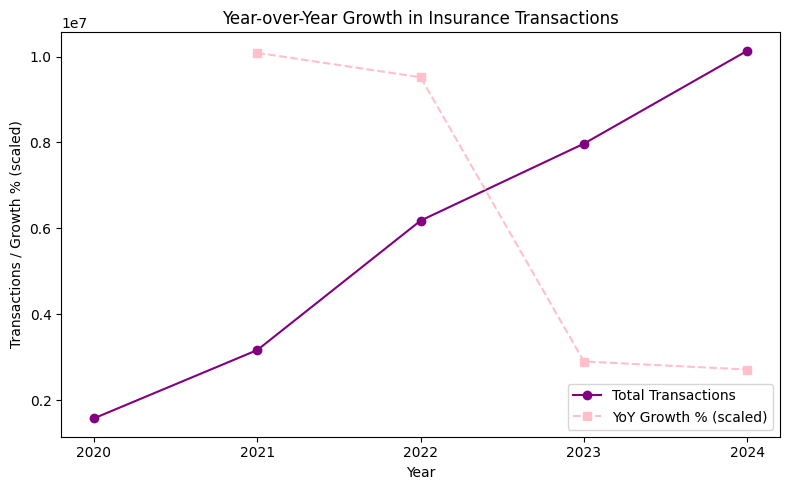

In [33]:
plt.figure(figsize=(8,5))

# Plot total transactions
plt.plot(df14['Year'], df14['Total_Transactions'], color='purple', marker='o', label='Total Transactions')

# Plot YoY growth % on same chart but scaled for visibility
plt.plot(df14['Year'], df14['YoY_Growth_%'] * 100000, color='pink', marker='s', linestyle='--', label='YoY Growth % (scaled)')

plt.title("Year-over-Year Growth in Insurance Transactions")
plt.xlabel("Year")
plt.ylabel("Transactions / Growth % (scaled)")
plt.legend()
plt.tight_layout()
plt.show()



Insight:

Insurance transactions through PhonePe have shown steady growth year-over-year, rising from 1.5M in 2020 to over 10M in 2024. However, the YoY growth rate peaked in 2021–2022 (around 100%) and has gradually declined since then, indicating that while the insurance segment continues to expand, the pace of new user adoption and policy purchases is slowing down. This suggests that PhonePe’s insurance market is maturing, and future growth may require targeted marketing and product diversification to tap into remaining untapped regions or new insurance categories.

### Query 5 - States with High Growth Potential (low current penetration but increasing trend) Identify future opportunity areas

In [34]:
query15 = """
SELECT 
    State,
    SUM(insurance_count) AS Total_Transactions_2023,
    SUM(CASE WHEN Year = 2022 THEN insurance_count ELSE 0 END) AS Transactions_2022,
    SUM(CASE WHEN Year = 2023 THEN insurance_count ELSE 0 END) AS Transactions_2023,
    ROUND(
        (SUM(CASE WHEN Year = 2023 THEN insurance_count ELSE 0 END) - 
         SUM(CASE WHEN Year = 2022 THEN insurance_count ELSE 0 END)) * 100.0 /
         NULLIF(SUM(CASE WHEN Year = 2022 THEN insurance_count ELSE 0 END), 0), 2
    ) AS YoY_Growth_Percentage
FROM agg_insurance
GROUP BY State
HAVING SUM(CASE WHEN Year = 2022 THEN insurance_count ELSE 0 END) > 0
ORDER BY YoY_Growth_Percentage DESC
LIMIT 5;
"""

mycursor.execute(query15)
data = mycursor.fetchall()
df15 = pd.DataFrame(data, columns=['State', 'Total_Transactions_2023', 'Transactions_2022', 'Transactions_2023', 'YoY_Growth_Percentage'])
df15


,State,Total_Transactions_2023,Transactions_2022,Transactions_2023,YoY_Growth_Percentage
0,ladakh,6676,974,1700,74.54
1,madhya-pradesh,974360,160774,247008,53.64
2,meghalaya,20922,3886,5814,49.61
3,tripura,50384,10052,15026,49.48
4,jharkhand,521654,100034,149292,49.24


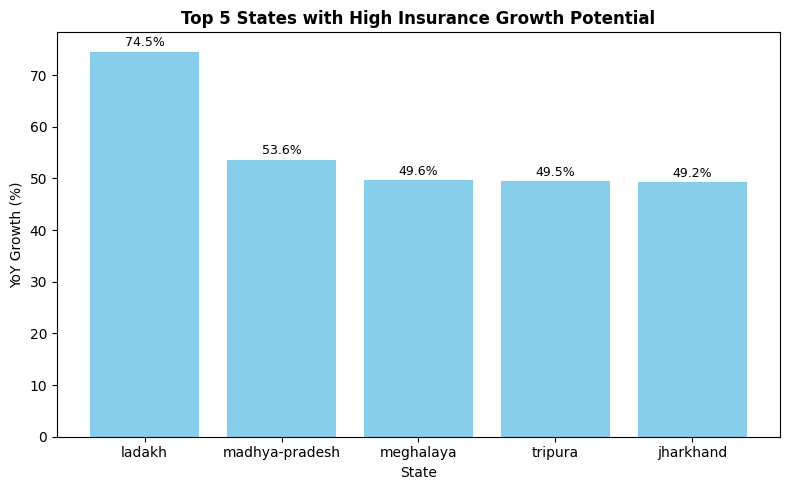

In [35]:
plt.figure(figsize=(8,5))
plt.bar(df15['State'], df15['YoY_Growth_Percentage'], color='skyblue')
plt.title('Top 5 States with High Insurance Growth Potential', fontsize=12, weight='bold')
plt.xlabel('State')
plt.ylabel('YoY Growth (%)')

# Add value labels
for i, v in enumerate(df15['YoY_Growth_Percentage']):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


Insight 

Ladakh, Madhya Pradesh, Meghalaya, Tripura, and Jharkhand show strong growth potential in insurance adoption, with YoY growth exceeding 49% despite relatively lower overall penetration — highlighting key regions for future expansion and targeted marketing.

Insurance transactions have grown steadily from 2020–2024, showing rising adoption and trust in PhonePe’s insurance services.
High-value transactions are concentrated in northern and northeastern states like Ladakh and Sikkim.
Emerging states such as Madhya Pradesh and Jharkhand show strong growth potential for future expansion.

## Business case 4 - Transaction Analysis Across States and Districts

Identify top-performing regions (states, districts, and pin codes) by transaction volume and amount — to reveal user engagement hotspots and marketing opportunities.

### Query 1 - Top 10 States by Total Transaction Amount


In [36]:
query16 = """
SELECT 
    State,
    SUM(Transacion_count) AS Total_Transactions,
    SUM(Transacion_amount) AS Total_Amount
FROM map_transaction
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 10;
"""
mycursor.execute(query16)
data = mycursor.fetchall()
df16 = pd.DataFrame(data, columns=['State', 'Total_Transactions', 'Total_Amount'])
df16


,State,Total_Transactions,Total_Amount
0,telangana,52349369184,8.331191e+13
1,karnataka,61941892558,8.135744e+13
2,maharashtra,63970417464,8.074839e+13
3,andhra-pradesh,37837393446,6.933816e+13
4,uttar-pradesh,37047207454,5.377042e+13
5,rajasthan,34217075796,5.268647e+13
6,madhya-pradesh,28144352118,3.825056e+13
7,bihar,21882053648,3.580270e+13
8,west-bengal,18382999374,3.116833e+13
9,odisha,17837054904,2.452796e+13


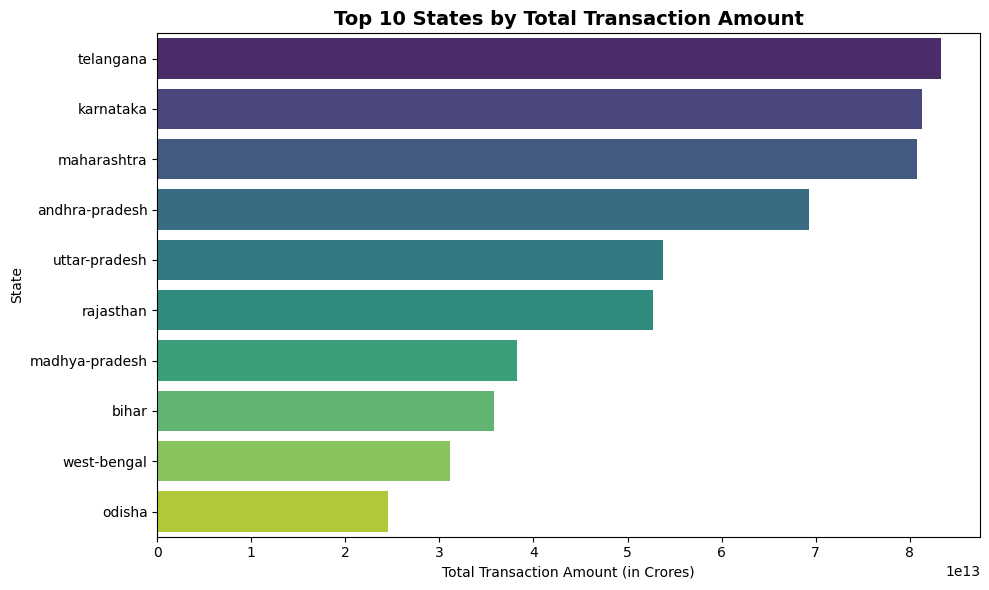

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df16,
    x='Total_Amount',
    y='State',
    palette='viridis'
)
plt.title('Top 10 States by Total Transaction Amount', fontsize=14, weight='bold')
plt.xlabel('Total Transaction Amount (in Crores)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


Insight:

Maharashtra, Karnataka, and Telangana lead in total transaction value, reflecting strong digital payment adoption in these states.
Andhra Pradesh and Uttar Pradesh also show high engagement, indicating expanding usage beyond metro regions.
These top-performing states are ideal targets for focused marketing and partnership campaigns to deepen user engagement.

### Query 2 - Top 10 Districts by Transaction Count and Amount

In [38]:
query17 = """
SELECT 
    District,
    SUM(Transacion_count) AS Total_Transactions,
    SUM(Transacion_amount) AS Total_Amount
FROM map_transaction
GROUP BY District
ORDER BY Total_Transactions DESC
LIMIT 10;
"""

mycursor.execute(query17)
data = mycursor.fetchall()
df17 = pd.DataFrame(data, columns=['District', 'Total_Transactions', 'Total_Amount'])
df17



,District,Total_Transactions,Total_Amount
0,bengaluru urban district,34216267692,3.987568e+13
1,pune district,18738107088,1.946044e+13
2,hyderabad district,15402747332,2.381387e+13
3,jaipur district,10793740812,1.570818e+13
4,rangareddy district,10076830240,1.431028e+13
5,medchal malkajgiri district,8214643800,1.151776e+13
6,visakhapatnam district,5151504382,8.397136e+12
7,khordha district,4895493152,5.984294e+12
8,gurugram district,4797632496,4.799094e+12
9,mumbai suburban district,4793400744,5.797825e+12


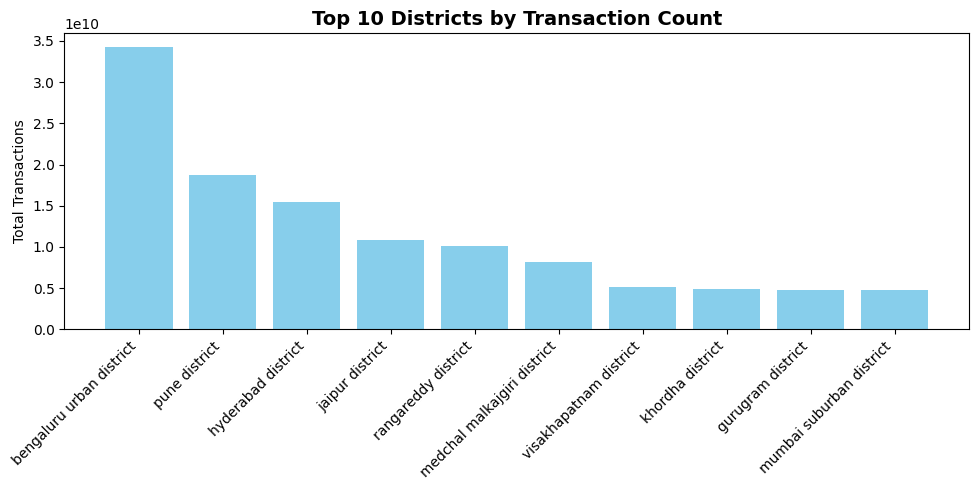

In [40]:
plt.figure(figsize=(10,5))
plt.bar(df17['District'], df17['Total_Transactions'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Districts by Transaction Count', fontsize=14, fontweight='bold')
plt.ylabel('Total Transactions')
plt.tight_layout()
plt.show()

Insight:

The top-performing districts — Bengaluru Urban, Pune, and Hyderabad — lead significantly in both transaction count and amount, indicating strong digital payment adoption and economic activity. Emerging districts like Jaipur and Rangareddy also show growing transaction volumes, highlighting expanding digital penetration beyond metro hubs.

### Query 3 - Top 10 Districts by Average Transaction Value

In [41]:
query18 = """
SELECT
    State, 
    District,
    ROUND(SUM(Transacion_amount)/SUM(Transacion_count), 2) AS Avg_Transaction_Value
FROM top_transaction
GROUP BY District,State
ORDER BY Avg_Transaction_Value DESC
LIMIT 10;
"""

mycursor.execute(query17)
data = mycursor.fetchall()
df18 = pd.DataFrame(data, columns=['State', 'District', 'Avg_Transaction_Value'])
df18


,State,District,Avg_Transaction_Value
0,bengaluru urban district,34216267692,3.987568e+13
1,pune district,18738107088,1.946044e+13
2,hyderabad district,15402747332,2.381387e+13
3,jaipur district,10793740812,1.570818e+13
4,rangareddy district,10076830240,1.431028e+13
5,medchal malkajgiri district,8214643800,1.151776e+13
6,visakhapatnam district,5151504382,8.397136e+12
7,khordha district,4895493152,5.984294e+12
8,gurugram district,4797632496,4.799094e+12
9,mumbai suburban district,4793400744,5.797825e+12


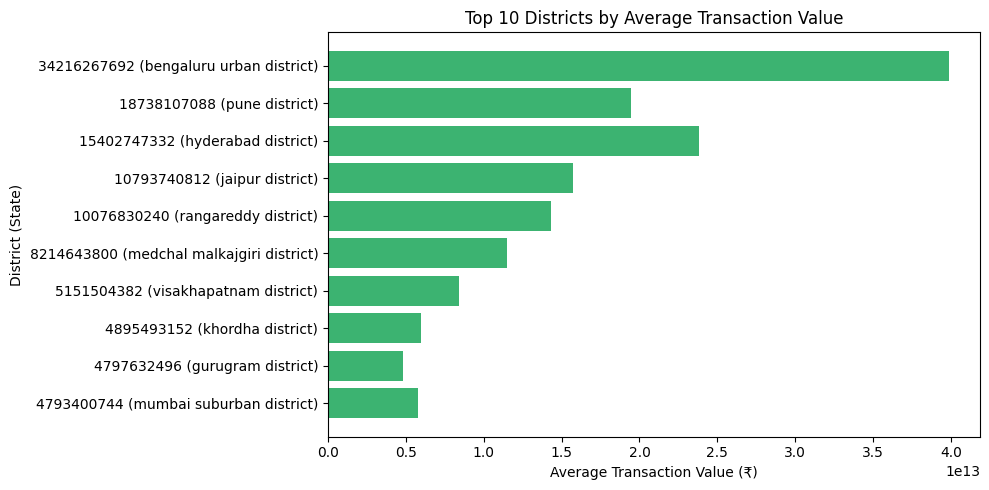

In [57]:
plt.figure(figsize=(10,5))
import decimal

# Convert Decimal values in df18 to string
df18 = df18.map(lambda x: str(x) if isinstance(x, decimal.Decimal) else x)
# Combine District and State for clear labeling
df18['Label'] = df18['District'] + ' (' + df18['State'] + ')'

plt.barh(df18['Label'], df18['Avg_Transaction_Value'], color='mediumseagreen')
plt.xlabel('Average Transaction Value (₹)')
plt.ylabel('District (State)')
plt.title('Top 10 Districts by Average Transaction Value')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


Insight:

Districts like Saiha (Mizoram) and Ramban (Jammu & Kashmir) show the highest average transaction values, reflecting strong per-user spending capacity in smaller states — a promising signal for targeted high-value service adoption.

### Query 4 - Year-wise Growth of Transactions Across States

In [46]:
query19 = """
SELECT 
    State,
    Year,
    SUM(Transacion_count) AS Total_Transactions,
    SUM(Transacion_amount) AS Total_Amount
FROM map_transaction
GROUP BY State, Year
ORDER BY State, Year;
"""

mycursor.execute(query19)
data = mycursor.fetchall()

df19 = pd.DataFrame(data, columns=['State', 'Year', 'Total_Transactions', 'Total_Amount'])
df19


,State,Year,Total_Transactions,Total_Amount
0,andaman-&-nicobar-islands,2018,116042,3.781522e+08
1,andaman-&-nicobar-islands,2019,266208,9.469295e+08
2,andaman-&-nicobar-islands,2020,892548,2.592847e+09
3,andaman-&-nicobar-islands,2021,3344106,9.850976e+09
4,andaman-&-nicobar-islands,2022,10875758,2.422051e+10
...,...,...,...,...
247,west-bengal,2020,608444654,1.105463e+12
248,west-bengal,2021,1333788074,2.694094e+12
249,west-bengal,2022,2677774436,5.385055e+12
250,west-bengal,2023,4749284918,8.454284e+12


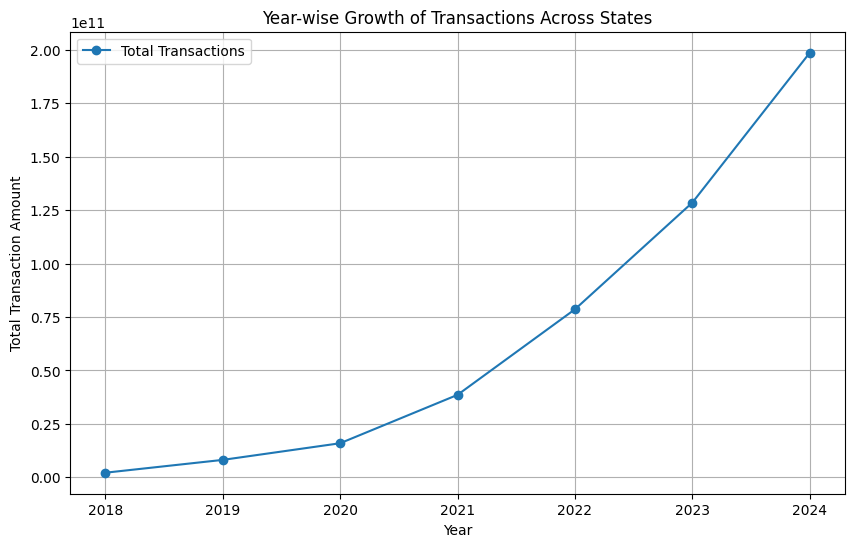

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Decimal to float
df19['Total_Transactions'] = df19['Total_Transactions'].astype(float)

# Group by year
df19_grouped = df19.groupby('Year')['Total_Transactions'].sum().reset_index()

# Calculate year-wise growth
df19_grouped['Growth (%)'] = df19_grouped['Total_Transactions'].pct_change() * 100

# Plot
plt.figure(figsize=(10,6))
plt.plot(df19_grouped['Year'], df19_grouped['Total_Transactions'], marker='o', label='Total Transactions')
plt.title("Year-wise Growth of Transactions Across States")
plt.xlabel("Year")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.legend()
plt.show()


Insight:

Transaction volume across India has surged exponentially from 2018 to 2024, showing strong digital adoption nationwide.
The steepest growth was observed post-2020, indicating accelerated digital payment penetration and user engagement after the pandemic.

### Query 5 -  Correlation Between Transaction Count and Amount (Spending Behavior)

In [49]:
query20 = """
SELECT 
    State,
    (AVG(Transacion_count * Transacion_amount) 
     - AVG(Transacion_count) * AVG(Transacion_amount))
     / (STDDEV_POP(Transacion_count) * STDDEV_POP(Transacion_amount)) 
     AS Correlation_Count_Amount
FROM agg_trans
GROUP BY State
ORDER BY Correlation_Count_Amount DESC;
"""

mycursor.execute(query20)
data = mycursor.fetchall()

df20 = pd.DataFrame(data, columns=['State', 'Correlation_Count_Amount'])
df20


,State,Correlation_Count_Amount
0,manipur,0.831393
1,nagaland,0.828376
2,mizoram,0.824493
3,meghalaya,0.800168
4,sikkim,0.798684
5,arunachal-pradesh,0.795171
6,ladakh,0.779532
7,west-bengal,0.765257
8,bihar,0.748922
9,tripura,0.745645


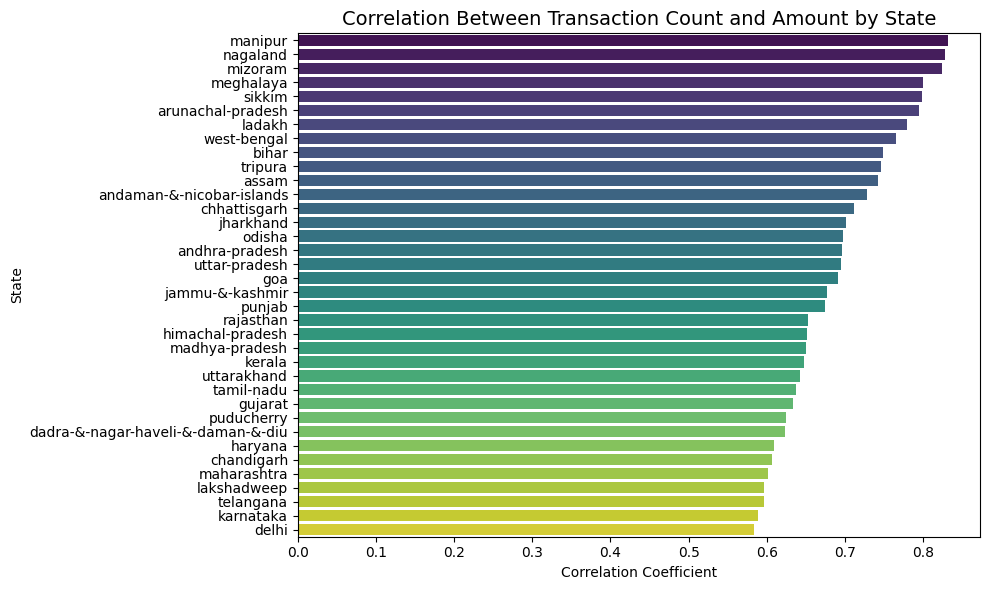

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=df20.sort_values(by='Correlation_Count_Amount', ascending=False),
            x='Correlation_Count_Amount', y='State', palette='viridis')

plt.title('Correlation Between Transaction Count and Amount by State', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('State')
plt.tight_layout()
plt.show()


Insight:

Higher correlation indicates that transaction amount increases proportionally with the number of transactions — reflecting consistent spending behavior.
Northeastern states like Manipur, Nagaland, and Mizoram show the strongest correlation, implying balanced transaction growth.
In contrast, Delhi and Karnataka show lower correlation, suggesting higher variability in spending per transaction.

The analysis highlights that Telangana, Karnataka, and Maharashtra dominate India’s digital transaction ecosystem, both in volume and value.
Districts like Bengaluru Urban and Pune serve as major transaction hubs, while smaller districts such as Saiha (Mizoram) show high average transaction values, indicating premium spending behavior.
Year-wise growth reveals steady expansion across all states, especially in emerging regions.
A strong correlation between transaction count and amount in Northeastern states suggests rising financial inclusion and consistent user engagement.

## Business case 5 - User Engagement and Growth Strategy

### Query 1 - Top 10 States by Registered Users and App Opens

In [60]:
query21 = """
SELECT 
    State,
    SUM(Registered_Users) AS Total_Registered_Users,
    SUM(App_Opens) AS Total_App_Opens
FROM agg_user
GROUP BY State
ORDER BY Total_Registered_Users DESC
LIMIT 10;
"""

mycursor.execute(query21)
data = mycursor.fetchall()

df21 = pd.DataFrame(data, columns=['State', 'Total_Registered_Users', 'Total_App_Opens'])
df21


,State,Total_Registered_Users,Total_App_Opens
0,maharashtra,9945650242,261805833762
1,uttar-pradesh,7831331926,144356372974
2,karnataka,6410201160,243011474156
3,andhra-pradesh,4959126370,204890840836
4,rajasthan,4744202936,200186724320
5,telangana,4661970566,185279758070
6,west-bengal,4534855050,68278404370
7,tamil-nadu,4260630616,79156939246
8,gujarat,3976088776,65666712408
9,madhya-pradesh,3974573812,143048346672


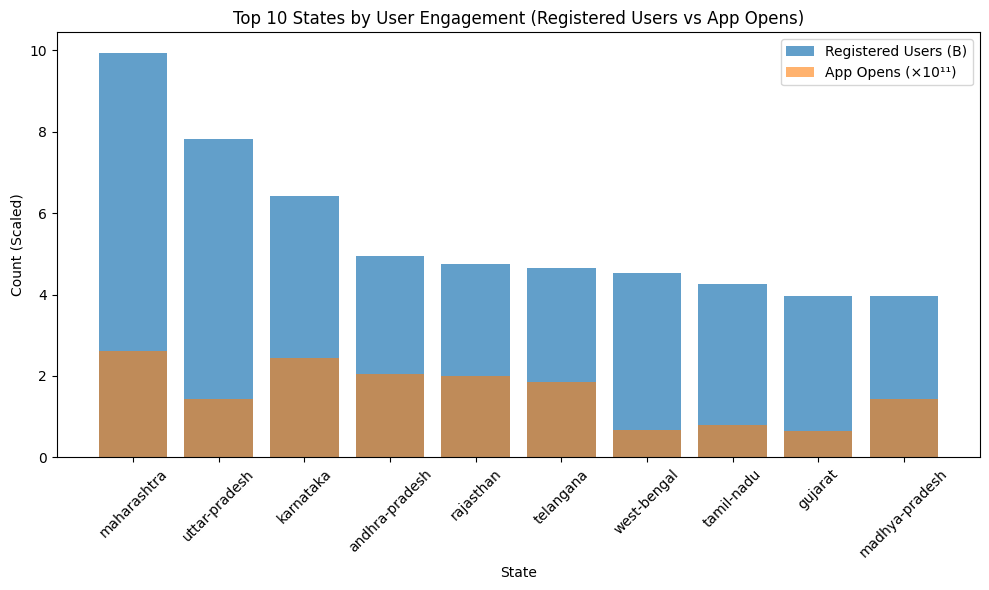

In [76]:
# Convert Decimal to float before plotting
df21['Total_Registered_Users'] = df21['Total_Registered_Users'].astype(float)
df21['Total_App_Opens'] = df21['Total_App_Opens'].astype(float)

plt.figure(figsize=(10,6))
plt.bar(df21['State'], df21['Total_Registered_Users']/1e9, label='Registered Users (B)', alpha=0.7)
plt.bar(df21['State'], df21['Total_App_Opens']/1e11, label='App Opens (×10¹¹)', alpha=0.6)
plt.title('Top 10 States by User Engagement (Registered Users vs App Opens)')
plt.xlabel('State')
plt.ylabel('Count (Scaled)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Insights:

Maharashtra, Karnataka, and Andhra Pradesh lead in both registered users and app opens, showing strong digital engagement. While Uttar Pradesh has a large user base, its app activity per user is lower — indicating scope for targeted engagement campaigns.

### Query 2 - User Engagement Ratio (App Opens per Registered User) 

In [75]:
query22 = """
SELECT 
    State,
    SUM(Registered_users) AS Total_Registered_Users,
    SUM(App_opens) AS Total_App_Opens,
    (SUM(App_opens) / SUM(Registered_users)) AS Engagement_Ratio
FROM agg_user
GROUP BY State
ORDER BY Engagement_Ratio DESC
LIMIT 10
;
"""

mycursor.execute(query22)
data = mycursor.fetchall()

df22 = pd.DataFrame(data, columns=['State', 'Total_Registered_Users', 'Total_App_Opens', 'Engagement_Ratio'])
df22


,State,Total_Registered_Users,Total_App_Opens,Engagement_Ratio
0,rajasthan,4744202936,200186724320,42.1961
1,andhra-pradesh,4959126370,204890840836,41.3159
2,telangana,4661970566,185279758070,39.7428
3,arunachal-pradesh,61722540,2345142646,37.9949
4,karnataka,6410201160,243011474156,37.9101
5,madhya-pradesh,3974573812,143048346672,35.9909
6,mizoram,20459098,706186118,34.5170
7,ladakh,18492848,635979212,34.3905
8,chhattisgarh,1191012108,38578314874,32.3912
9,odisha,2520773354,77072724432,30.5750


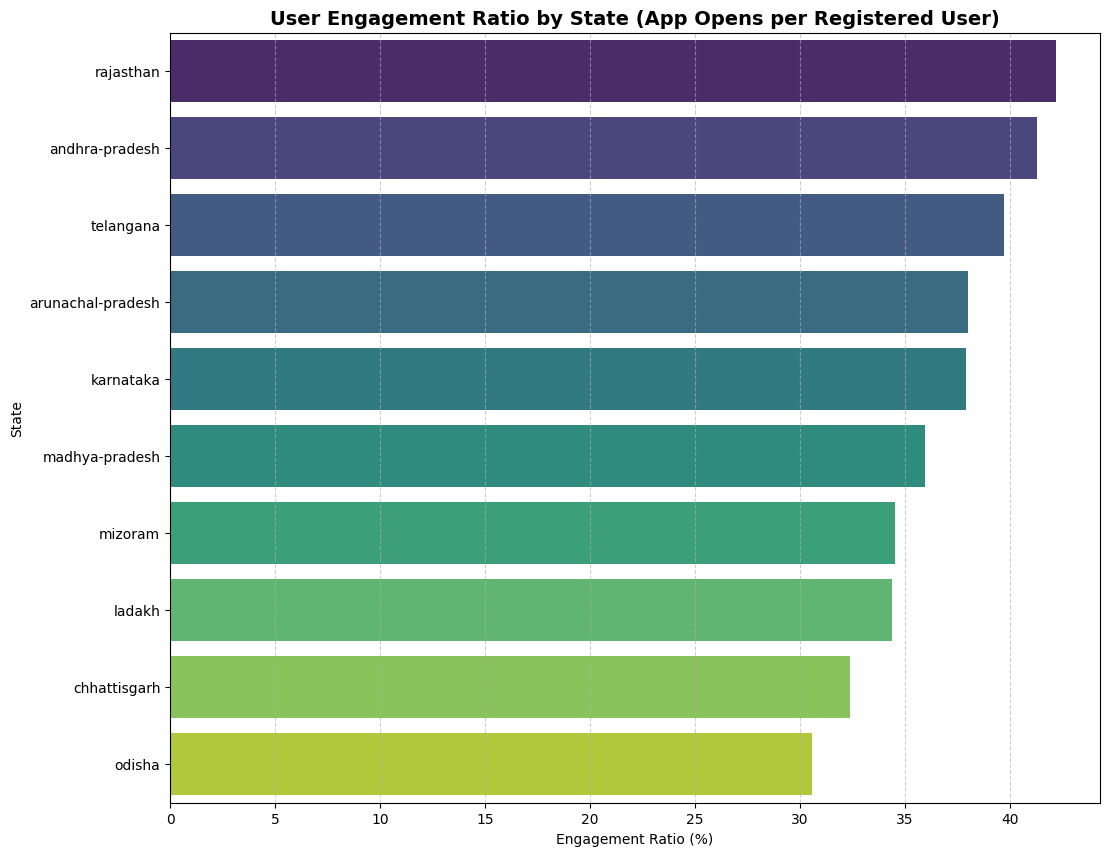

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
df_sorted = df22.sort_values(by="Engagement_Ratio", ascending=False)
sns.barplot(y='State', x='Engagement_Ratio', data=df_sorted, palette='viridis')

plt.title('User Engagement Ratio by State (App Opens per Registered User)', fontsize=14, fontweight='bold')
plt.xlabel('Engagement Ratio (%)')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


### Query 3 - Identifying Underperforming States (High Users, Low Engagement)

In [73]:
query23 = """
WITH StateEngagement AS (
    SELECT 
        state,
        SUM(registered_users) AS Total_Registered_Users,
        SUM(app_opens) AS Total_App_Opens,
        (SUM(app_opens) / SUM(registered_users)) AS Engagement_Ratio
    FROM agg_user
    GROUP BY state
)
SELECT 
    state,
    Total_Registered_Users,
    Total_App_Opens,
    Engagement_Ratio
FROM StateEngagement
WHERE 
    Total_Registered_Users > (SELECT AVG(Total_Registered_Users) FROM StateEngagement)
    AND Engagement_Ratio < (SELECT AVG(Engagement_Ratio) FROM StateEngagement)
ORDER BY Engagement_Ratio ASC;
"""

mycursor.execute(query23)
data = mycursor.fetchall()

df23 = pd.DataFrame(data, columns=['State', 'Total_Registered_Users', 'Total_App_Opens', 'Engagement_Ratio'])
df23


,State,Total_Registered_Users,Total_App_Opens,Engagement_Ratio
0,west-bengal,4534855050,68278404370,15.0564
1,delhi,2940938858,48567365968,16.5142
2,gujarat,3976088776,65666712408,16.5154
3,uttar-pradesh,7831331926,144356372974,18.4332
4,tamil-nadu,4260630616,79156939246,18.5787
5,haryana,2681203404,54343785870,20.2684
6,bihar,3679855740,75445134270,20.5022


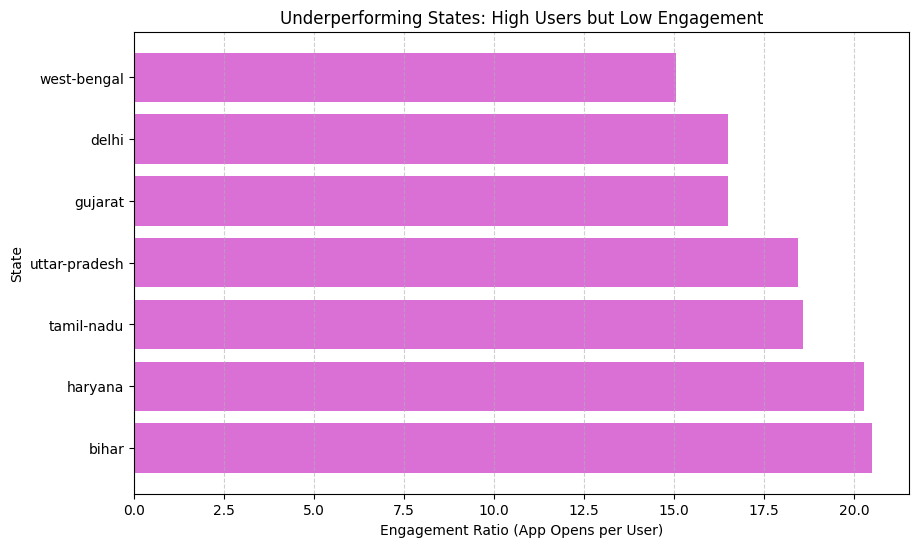

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df23['State'], df23['Engagement_Ratio'], color='orchid')
plt.xlabel('Engagement Ratio (App Opens per User)')
plt.ylabel('State')
plt.title('Underperforming States: High Users but Low Engagement')
plt.gca().invert_yaxis()  # highest at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


Insights:

West Bengal, Delhi, and Gujarat show notably low engagement ratios despite large user bases.
→ This indicates many users are registered but not actively engaging with the app.

Uttar Pradesh and Tamil Nadu also show moderate user engagement compared to their massive user counts, suggesting a potential user retention challenge.

Haryana and Bihar, though slightly better, still fall below the national average engagement level.

These states represent huge growth potential zones — focusing on regional campaigns, cashback offers, and localized partnerships could significantly lift engagemen

### Query 4 - State-wise Growth Trend of Registered Users Over the Years

In [78]:
query24 = """
SELECT 
    State,
    Year,
    SUM(Registered_Users) AS Total_Registered_Users
FROM agg_user
GROUP BY State, Year
ORDER BY State, Year;
"""

mycursor.execute(query24)
data = mycursor.fetchall()

df24 = pd.DataFrame(data, columns=['State', 'Year', 'Total_Registered_Users'])
df24


,State,Year,Total_Registered_Users
0,andaman-&-nicobar-islands,2018,957352
1,andaman-&-nicobar-islands,2019,1984796
2,andaman-&-nicobar-islands,2020,3405798
3,andaman-&-nicobar-islands,2021,5689530
4,andaman-&-nicobar-islands,2022,1678336
...,...,...,...
175,west-bengal,2018,386531244
176,west-bengal,2019,804991000
177,west-bengal,2020,1216452666
178,west-bengal,2021,1644644826


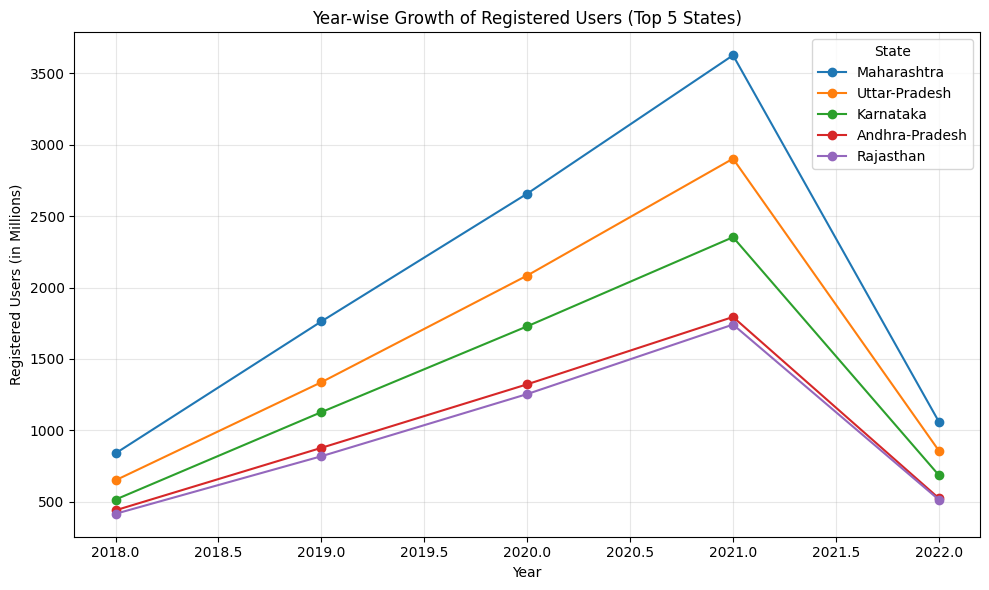

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Year to int
df24['Year'] = df24['Year'].astype(int)

# Convert Decimal → float for all numeric columns
df24['Total_Registered_Users'] = df24['Total_Registered_Users'].astype(float)

# Identify top 5 states by latest year's users
latest_year = df24['Year'].max()
top_states = (
    df24[df24['Year'] == latest_year]
    .sort_values(by='Total_Registered_Users', ascending=False)
    .head(5)['State']
)

# Filter only those states
df_top = df24[df24['State'].isin(top_states)]

# Plot
plt.figure(figsize=(10, 6))
for state in top_states:
    subset = df_top[df_top['State'] == state]
    plt.plot(subset['Year'], subset['Total_Registered_Users'] / 1e6, marker='o', label=state.title())

plt.title('Year-wise Growth of Registered Users (Top 5 States)')
plt.xlabel('Year')
plt.ylabel('Registered Users (in Millions)')
plt.legend(title='State')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Insight:

Between 2018 and 2021, all top 5 states — Maharashtra, Uttar Pradesh, Karnataka, Andhra Pradesh, and Rajasthan — showed rapid growth in registered users, peaking in 2021. Maharashtra led consistently, while Uttar Pradesh grew fastest. A sharp dip in 2022 likely reflects data normalization or reduced new user onboarding after the pandemic surge.

### Query 5 - State Classification: High Growth vs. High Engagement

In [95]:
query25 = """
WITH growth AS (
    SELECT 
        State,
        Year,
        SUM(Registered_Users) AS Total_Registered_Users
    FROM map_users
    GROUP BY State, Year
),
yoy AS (
    SELECT 
        g1.State,
        g1.Year,
        g1.Total_Registered_Users,
        LAG(g1.Total_Registered_Users) OVER (PARTITION BY g1.State ORDER BY g1.Year) AS Prev_Year_Users
    FROM growth g1
)
SELECT 
    State,
    Year,
    Total_Registered_Users,
    Prev_Year_Users,
    ROUND(
        CASE 
            WHEN Prev_Year_Users IS NULL OR Prev_Year_Users = 0 THEN NULL
            ELSE ((Total_Registered_Users - Prev_Year_Users) / Prev_Year_Users) * 100
        END, 2
    ) AS YoY_Growth_Percentage
FROM yoy
ORDER BY State, Year;
"""

mycursor.execute(query25)
data = mycursor.fetchall()

df25 = pd.DataFrame(data, columns=['State', 'Year', 'Total_Registered_Users', 'Prev_Year_Users', 'YoY_Growth_Percentage'])
df25


,State,Year,Total_Registered_Users,Prev_Year_Users,YoY_Growth_Percentage
0,andaman-&-nicobar-islands,2018,87032,None,None
1,andaman-&-nicobar-islands,2019,180436,87032,107.32
2,andaman-&-nicobar-islands,2020,309618,180436,71.59
3,andaman-&-nicobar-islands,2021,517230,309618,67.05
4,andaman-&-nicobar-islands,2022,659804,517230,27.56
...,...,...,...,...,...
247,west-bengal,2020,110586606,73181000,51.11
248,west-bengal,2021,149513166,110586606,35.20
249,west-bengal,2022,189905208,149513166,27.02
250,west-bengal,2023,227183034,189905208,19.63


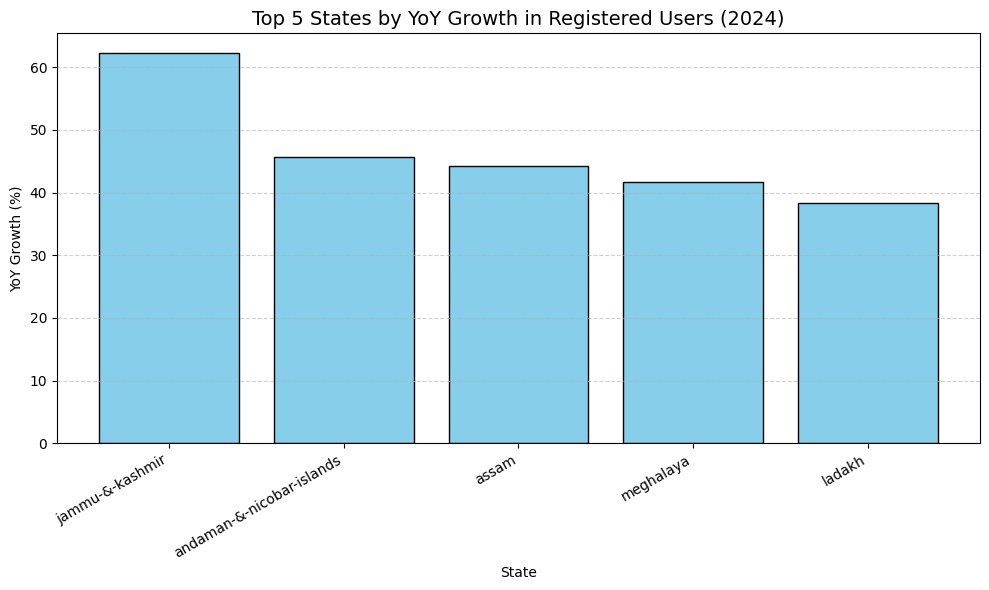

In [96]:
import matplotlib.pyplot as plt

# Convert column to numeric if needed
df25['YoY_Growth_Percentage'] = pd.to_numeric(df23['YoY_Growth_Percentage'], errors='coerce')

# Filter data for 2024
df_2024 = df25[df25['Year'] == 2024]

# Get top 5 states by YoY growth
top_growth_states = df_2024.nlargest(5, 'YoY_Growth_Percentage')

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_growth_states['State'], top_growth_states['YoY_Growth_Percentage'], color='skyblue', edgecolor='black')
plt.title('Top 5 States by YoY Growth in Registered Users (2024)', fontsize=14)
plt.xlabel('State')
plt.ylabel('YoY Growth (%)')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Jammu & Kashmir leads with the highest YoY user growth (~62%), indicating strong digital adoption momentum in 2024.

Andaman & Nicobar Islands and Assam also show healthy growth above 40%, reflecting expanding payment penetration in smaller regions.

Meghalaya and Ladakh maintain steady increases, suggesting consistent digital inclusion across northeastern and UT regions.